In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from IPython.core.display import Image

In [4]:
df = gpd.read_file("counties.geojson")
df.head()

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."


<AxesSubplot:>

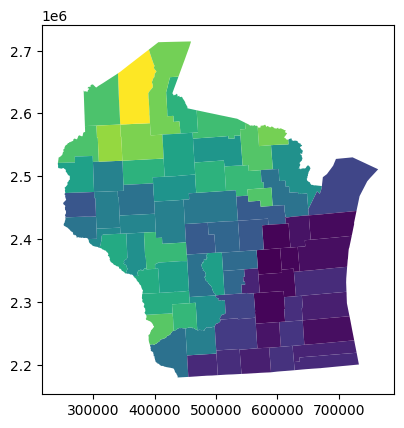

In [7]:
df.plot(column="forest")

# Clustering Counties (KMeans)

1.2909085151228035


<AxesSubplot:>

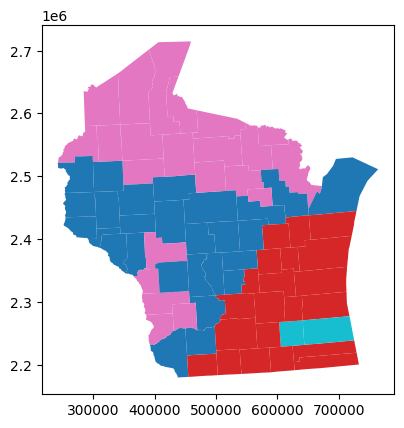

In [17]:
c = KMeans(4)
c.fit(df[["developed", "forest", "pasture", "crops"]])
print(c.inertia_)
groups = c.predict(df[["developed", "forest", "pasture", "crops"]])
df.plot(column=groups, cmap="tab10")

# Clustering Counties (Agglomerative)

<AxesSubplot:>

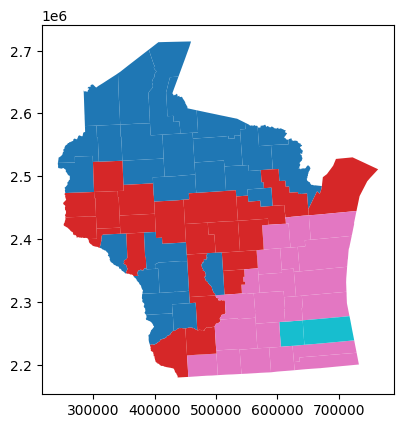

In [26]:
c = AgglomerativeClustering(4)

groups = c.fit_predict(df[["developed", "forest", "pasture", "crops"]])

# print(c.inertia_) # no centroids => no inertia => no elbow plots (how do we pick cluster count)

# AgglomerativeClustering can't do predict on
# differents points (one could change the whole tree)
#groups = c.predict(df[["developed", "forest", "pasture", "crops"]])

df.plot(column=groups, cmap="tab10")

# Tree Recursion: Node Count

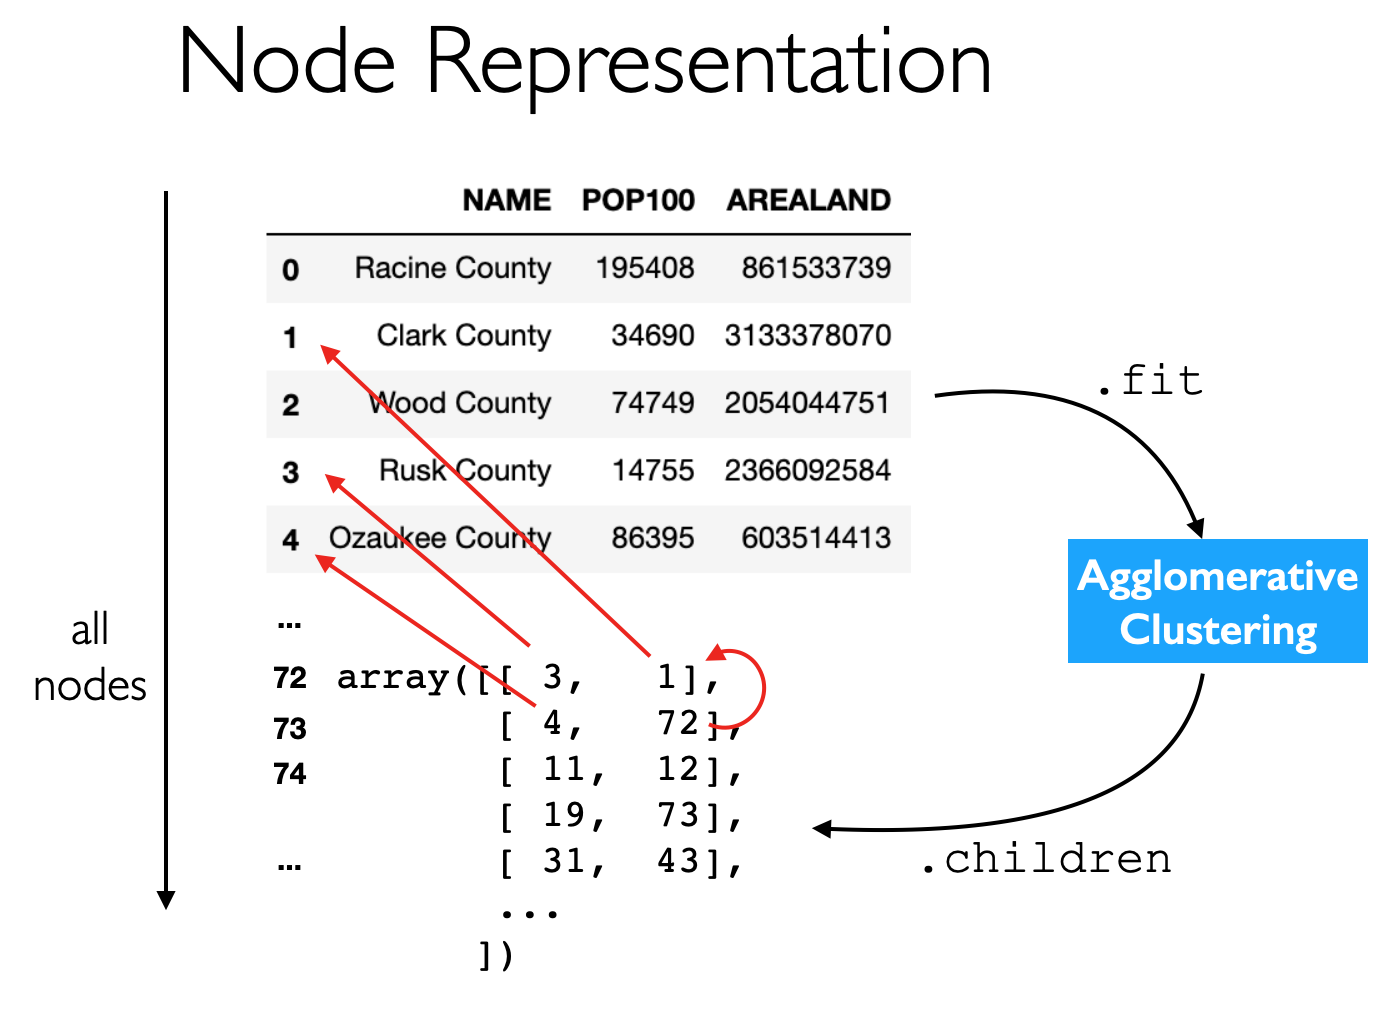

In [23]:
Image("children.png", width=400)

# Linkage Matrix => Dendrogram

# Moons

https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage

<AxesSubplot:xlabel='x', ylabel='y'>

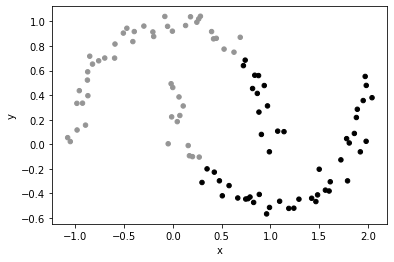

In [2]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns=["x", "y"])
df["color"] = KMeans(n_clusters=2).fit_predict(df[["x", "y"]])
df.plot.scatter(x="x", y="y", c=df["color"], vmin=-1)